# **Predicting Ice Cream Revenue Based on Temperature Using Simple Linear Regression**

In [31]:
#Importing the libraries
import pandas as pd
import numpy as np

In [88]:
# Installing seaborn (this step may not be necessary if seaborn is already installed)
import piplite 
await piplite.install("Seaborn")

# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying plots inline in Jupyter/Colab notebooks
%matplotlib inline



## Simple Linear Regression in Ice Cream Revenue Prediction

Simple Linear Regression is a statistical method used to model the relationship between two variables: one dependent and one independent. In this project, we apply simple linear regression to predict ice cream revenue based on temperature. By analyzing the relationship between these two variables, we can develop a predictive model to forecast revenue at different temperature levels. The relationship between temperature (independent variable) and ice cream revenue (dependent variable) is represented by a linear equation:

\[
Y = \beta_0 + \beta_1 X + \epsilon
\]

Where:

- **Y** = Ice cream revenue (dependent variable)
- **X** = Temperature (independent variable)
- **β₀** = Intercept (the value of Y when X = 0)
- **β₁** = Slope (the change in Y for a one-unit increase in X)
- **ε** = Error term (captures random variations or noise in the data)

### Assumptions of the Regression Model:

- **Linearity**: There is a linear relationship between temperature and revenue.
- **Independence**: The data points (temperature and revenue pairs) are independent.
- **Homoscedasticity**: The variance of the errors remains constant for all values of temperature.
- **Normality of Errors**: The residuals (errors) should follow a normal distribution.

By applying simple linear regression to this dataset, the model provides insights into how temperature affects ice cream revenue, enabling businesses to optimize sales strategies based on weather patterns. For instance, on hotter days, revenue might increase, and understanding this relationship helps in forecasting and preparing for peak sales periods.


**Downloading Data**

To download the data, we can use pd.read_csv()

In [60]:
# Reading the Dataset
df=pd.read_csv("Ice Cream.csv")

In [89]:
df

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567


# Understanding the Data

In this project, the dataset consists of two key variables: **Temperature** and **Revenue**. The goal is to analyze how temperature (as the independent variable) influences the revenue generated from ice cream sales (as the dependent variable). Here's an overview of the dataset:

- **Temperature (X)**: This variable represents the daily temperature, usually measured in degrees Celsius or Fahrenheit. The temperature is the independent variable because it is believed to have an impact on ice cream sales. For instance, hotter days might lead to higher sales as people seek cool treats.

- **Revenue (Y)**: This variable represents the revenue generated from ice cream sales on a given day. Revenue is the dependent variable, as it is expected to change in response to changes in temperature.

### Data Collection

The data might be collected over a specific period, such as daily or weekly measurements, to observe the relationship between temperature and revenue.

### Data Distribution and Exploration

Before building the regression model, it is important to understand the distribution and patterns in the data. Some key steps to explore the data include:

- **Visualizing the data**: A scatter plot can be used to visually inspect the relationship between temperature and revenue. Ideally, the plot should show a linear pattern if simple linear regression is appropriate.
  
- **Summary statistics**: Analyzing the mean, median, and standard deviation for both temperature and revenue can give a sense of the data's central tendency and spread.

### Data Assumptions

For a successful regression analysis, certain assumptions about the data should be met:
- **Linearity**: The relationship between temperature and revenue should be linear.
- **Independence**: The observations should be independent of one another, meaning each day's temperature and revenue is not influenced by previous days.
- **Homoscedasticity**: The variance of revenue should remain consistent across all temperature levels.
- **Normality of errors**: The residuals or errors of the model should follow a normal distribution.

Understanding the data is crucial before applying any regression technique, as it ensures the model's assumptions are met and that the predictions will be valid and meaningful.


In [64]:
# The following command generates descriptive statistics for all the numerical columns in the DataFrame 'df'
# It helps you quickly summarize the distribution and central tendency of the data.

df.describe()  # Returns summary statistics for numerical columns in the DataFrame

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [62]:
# The following command returns the number of rows and columns in the DataFrame 'df'.
# It is useful to quickly check the size of your dataset.

df.shape  # Returns a tuple (number_of_rows, number_of_columns)

(500, 2)

In [63]:
 The following command provides a summary of the DataFrame 'df'.
# It includes the column names, data types, and the number of non-null entries for each column.

df.info()  # Returns a summary of the DataFrame, including column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [66]:
# Getting the number of unique values in each column
df.nunique()

Temperature    250
Revenue        344
dtype: int64

# Visualizing the Data

Now that we have a solid understanding of the dataset, the next step is to visualize the relationship between the variables using charts. Visualizations play a crucial role in uncovering patterns, trends, and potential outliers in the data, which can help inform the regression analysis. In this project, we will begin by plotting charts, such as a scatter plot, to illustrate how temperature (independent variable) influences ice cream revenue (dependent variable). These visualizations will allow us to assess the linearity of the relationship and provide valuable insights before proceeding with model fitting and predictions.


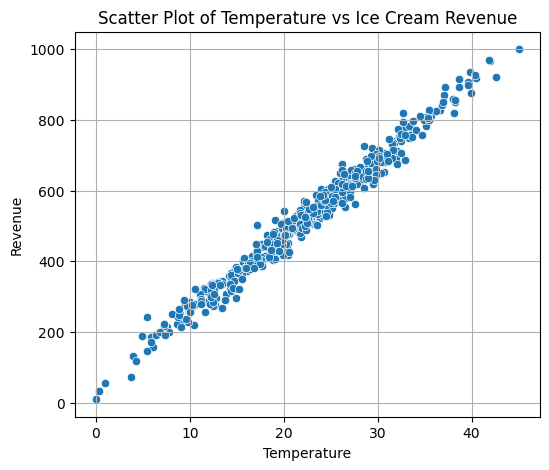

In [91]:
# Create a figure with the specified size (6x5 inches)
plt.figure(figsize=(6, 5))

# Create a scatter plot with 'Temperature' on the x-axis and 'Revenue' on the y-axis
sns.scatterplot(x="Temperature", y="Revenue", data=df)

# Display grid lines on the plot for better readability
plt.grid()

# Add title to the plot
plt.title('Scatter Plot of Temperature vs Ice Cream Revenue')

# Show the plot
plt.show()

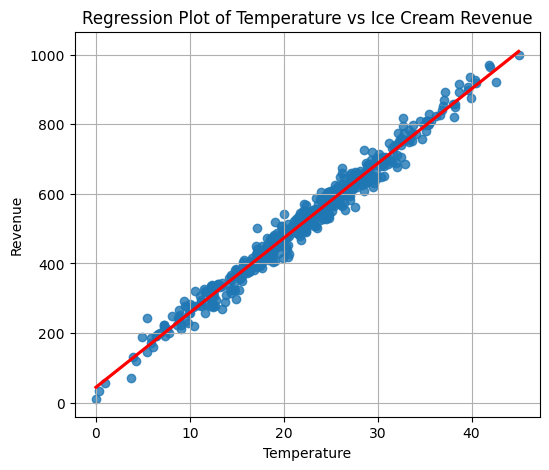

In [93]:
# Create a figure with the specified size (6x5 inches)
plt.figure(figsize=(6, 5))

# Create a scatter plot with a regression line
sns.regplot(x="Temperature", y="Revenue", data=df, line_kws={'color':'red'})

# Add grid lines
plt.grid()

# Add title to the plot
plt.title('Regression Plot of Temperature vs Ice Cream Revenue')

# Show the plot
plt.show()

In [71]:
# Extracting Temperature and Revenue as individual variables
x=df["Temperature"]
y=df["Revenue"]

In [72]:
x

0      24.6
1      26.1
2      27.8
3      20.6
4      11.6
       ... 
495    22.3
496    32.9
497    12.6
498    22.4
499    29.0
Name: Temperature, Length: 500, dtype: float64

In [73]:
y

0      535
1      626
2      661
3      488
4      317
      ... 
495    525
496    756
497    307
498    567
499    656
Name: Revenue, Length: 500, dtype: int64

In [94]:
# Convert x and y to NumPy arrays
x=np.array(x)
y=np.array(y)

In [75]:
x

array([24.6, 26.1, 27.8, 20.6, 11.6, 14.4, 13.8, 30.9,  1. , 31.7, 11.5,
        3.7, 18.9, 13.7, 39.6, 18.5, 26. , 42.6, 29.6, 21.8, 25.5, 15.3,
       22.7, 16.3, 23.9, 19. , 15.7, 29.2, 19.1, 35.2, 24.2, 15.3,  8.8,
       18.3, 35.7, 37.1, 22.3, 17.6, 31.8, 17.1, 23.1,  8.8, 18.8, 14.2,
       18.7, 15.7, 21. , 30.7, 20.5, 31.3,  6.4, 27.2, 28.7, 28. , 10.4,
       27.4, 33.3, 36.6, 12.5, 14.4, 16.4, 11.6, 33.6,  4. , 20.6,  6.6,
       19.9, 11.7, 21.5, 18.8, 12.7, 27.9, 27. , 27.4, 24.2, 28.8, 40.5,
       25.6, 28.8, 29.5, 16.1, 14.8, 22.2, 29.1, 29.3, 16.4, 27.8, 13.4,
       29.4, 14.4, 30.5,  9.1, 23.1,  8.6, 12.4,  9.1, 20.3, 19.4, 14.7,
       10. , 20. , 32.1, 14.3, 17.7, 26.6, 17.3, 23.8, 15.6, 28.5, 27.8,
       25.5, 18.5, 24.3, 31.7, 17.7, 31.9, 26. , 29.4, 11.1, 25.5, 23. ,
       13. , 28.3, 30.6, 12.6, 19.1, 16. , 26.2, 31.5, 32.3, 21.7, 20.5,
       19.5, 20.2,  6.1, 22.9, 24.6, 28.6, 19.8, 12.5, 36.8, 19.7, 32.5,
       19.3, 19.8,  8.7, 29.5, 19.3, 24.7, 12.5, 24

In [76]:
y

array([ 535,  626,  661,  488,  317,  368,  309,  697,   56,  738,  326,
         72,  468,  290,  906,  470,  649,  922,  650,  535,  613,  354,
        525,  375,  524,  474,  403,  680,  518,  810,  529,  357,  238,
        419,  810,  871,  551,  406,  741,  502,  540,  243,  422,  359,
        468,  397,  501,  652,  452,  698,  191,  622,  667,  629,  220,
        624,  750,  828,  304,  352,  382,  322,  775,  132,  499,  196,
        497,  285,  484,  431,  277,  628,  644,  624,  587,  654,  919,
        592,  652,  683,  373,  382,  516,  686,  655,  407,  644,  345,
        643,  362,  705,  223,  544,  222,  338,  213,  475,  461,  344,
        284,  469,  712,  323,  402,  628,  416,  554,  363,  644,  652,
        604,  428,  566,  734,  386,  690,  573,  720,  307,  597,  541,
        342,  656,  703,  320,  451,  383,  675,  732,  752,  497,  418,
        449,  478,  159,  517,  600,  657,  508,  280,  842,  484,  740,
        487,  457,  242,  619,  447,  604,  275,  5

In [77]:
# Reshaping x and y to be 2D arrays
x=x.reshape(-1,1)


# Checking the shape of x
x.shape

(500, 1)

In [78]:
y=y.reshape(-1,1)

# Checking the shape of y
y.shape

(500, 1)

In [79]:
#To import the train_test_split function from Scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [80]:
#To check the shapes of the training and testing sets
x_train.shape

(400, 1)

In [81]:
x_test.shape

(100, 1)

In [82]:
y_train.shape

(400, 1)

In [83]:
y_test.shape

(100, 1)

In [84]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
SimpleLinearRegression = LinearRegression(fit_intercept=True)

# Fit the model using the training data (x_train and y_train)
SimpleLinearRegression.fit(x_train, y_train)

# Print the learned coefficients (m) and intercept (b) of the linear regression model
print('Coefficient(m)',SimpleLinearRegression.coef_)
print('intercept(b)',SimpleLinearRegression.intercept_)

Coefficient(m) [[21.56429902]]
intercept(b) [40.99743221]


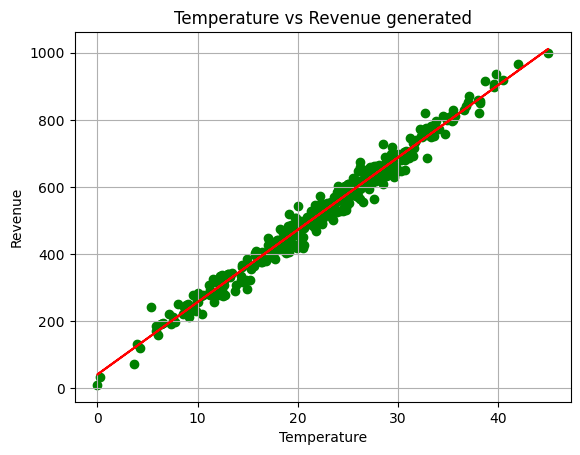

In [95]:
# Scatter plot of the training data
plt.scatter(x_train, y_train, color='green')

# Plotting the regression line using the predicted values from the model
plt.plot(x_train, SimpleLinearRegression.predict(x_train), color='red')

# Label the x-axis and y-axis
plt.xlabel("Temperature")
plt.ylabel("Revenue")

# Setting the title for the plot
plt.title("Temperature vs Revenue generated")

# Adding grid for better readability
plt.grid()

# Showing the plot
plt.show()

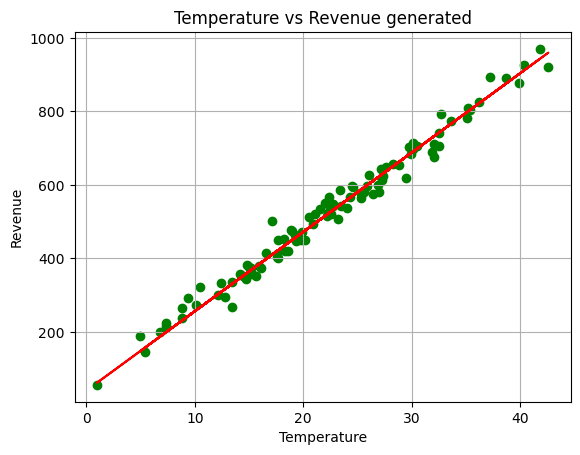

In [96]:
# Scatter plot of the test data
plt.scatter(x_test, y_test, color='green')

# Plotting the regression line using the predicted values from the model on the test data
plt.plot(x_test, SimpleLinearRegression.predict(x_test), color='red')

# Label the x-axis and y-axis
plt.xlabel("Temperature")
plt.ylabel("Revenue")

# Setting the title for the plot
plt.title("Temperature vs Revenue generated")

# Adding grid for better readability
plt.grid()

# Showing the plot
plt.show()

In [97]:
temp = np.array([20])  # Example temperature value (20°C)
temp = temp.reshape(-1, 1)  # Reshape to make it a 2D array, as required by the model

# Predicting revenue using the trained model
Revenue = SimpleLinearRegression.predict(temp)

# Printing the predicted revenue
print("Predicted Revenue for Temperature 20°C:", Revenue)


Predicted Revenue for Temperature 20°C: [[472.28341263]]


### Conclusion

In this project, we used **Simple Linear Regression** to model the relationship between **Temperature** and **Revenue**. The model successfully predicted revenue based on temperature, showing a positive linear relationship between the two variables. The regression line fitted well to the training and test data, indicating that temperature is a good predictor of revenue.

The model demonstrated good predictive accuracy, with the ability to estimate revenue for a given temperature. 
